# K-means
Никифорова Мария, 207 группа

In [63]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans
import seaborn as sns

In [64]:
np.random.seed(10)
max_iters = 50
EPS = 0.0001
INF = 10**9
cluster_cnt = 5
features_cnt = 2
sample_size = 1000
random_state = 170
centers = []
np.random.seed(random_state)

In [65]:
def dist(x, y, n):
    z = (x - y) ** 2
    return np.sqrt(z.sum())

In [66]:
def dist_sqr(x, y, n):
    z = (x - y) ** 2
    return z.sum()

In [67]:
def k_means_forgy(sample, sample_size, cluster_cnt, features_cnt):
    permutation = np.random.permutation(sample_size)
    centers = [sample[permutation[i]] for i in range(cluster_cnt)]
    labels = np.zeros(sample_size, dtype = int)
    cnt_iters = 0
    is_changed = True
    while (cnt_iters < max_iters and is_changed):
        cnt_iters += 1
        for i in range(sample_size):
            min_dist = dist(sample[i], centers[0], features_cnt)
            min_label = 0
            for j in range(1, cluster_cnt):
                curr_dist = dist(sample[i], centers[j], features_cnt)
                if curr_dist < min_dist:
                    min_dist = curr_dist
                    min_label = j
            labels[i] = min_label
        new_centers = np.zeros(cluster_cnt * features_cnt).reshape(cluster_cnt, features_cnt)
        cnt_el = np.zeros(cluster_cnt)
        for i in range(sample_size):
            j = labels[i]
            cnt_el[j] += 1
            new_centers[j] += sample[i]
        for i in range(cluster_cnt):
            if (cnt_el[i] != 0):
                new_centers[i] = [new_centers[i]] / cnt_el[i]
        is_changed = any((dist(new_centers[i], centers[i], features_cnt) > EPS) for i in range(cluster_cnt))
        centers = new_centers.copy()
    return labels

In [68]:
def k_means_rand_part(sample, sample_size, cluster_cnt, features_cnt):
    indices = np.random.choice(range(0, cluster_cnt), size = sample_size);
    centers = np.zeros(cluster_cnt * features_cnt).reshape(cluster_cnt, features_cnt)
    for i in range(cluster_cnt):
        cnt = 0
        s = np.array([0, 0], dtype = "float64")
        for j in range(sample_size):
            if (indices[j] == i):
                s += sample[j]
                cnt += 1
        centers[i] = s / cnt
    labels = np.zeros(sample_size, dtype = int)
    cnt_iters = 0
    is_changed = True
    while (cnt_iters < max_iters and is_changed):
        cnt_iters += 1
        for i in range(sample_size):
            min_dist = dist(sample[i], centers[0], features_cnt)
            min_label = 0
            for j in range(1, cluster_cnt):
                curr_dist = dist(sample[i], centers[j], features_cnt)
                if curr_dist < min_dist:
                    min_dist = curr_dist
                    min_label = j
            labels[i] = min_label
        new_centers = np.zeros(cluster_cnt * features_cnt).reshape(cluster_cnt, features_cnt)
        cnt_el = np.zeros(cluster_cnt)
        for i in range(sample_size):
            j = labels[i]
            cnt_el[j] += 1
            new_centers[j] += sample[i]
        for i in range(cluster_cnt):
            if (cnt_el[i] != 0):
                new_centers[i] = [new_centers[i]] / cnt_el[i]
        is_changed = any((dist(new_centers[i], centers[i], features_cnt) > EPS) for i in range(cluster_cnt))
        centers = new_centers.copy()
    return labels

In [69]:
def k_means_plusplus(sample, sample_size, cluster_cnt, features_cnt):
    global centers
    centers = np.zeros(cluster_cnt * features_cnt).reshape(cluster_cnt, features_cnt)
    first = np.random.randint(0, sample_size - 1)
    is_choosen = [False] * sample_size
    is_choosen[first] = True
    centers[0] = sample[first]
    for i in range(1, cluster_cnt):
        dist_c = np.zeros(sample_size)
        for j in range(sample_size):
            if (not(is_choosen[j])):
                min_dist = INF
                for k in range(sample_size):
                    if (is_choosen[k]):
                        min_dist = min(dist_sqr(sample[j], sample[k], features_cnt), min_dist)
                dist_c[j] = min_dist
        sum_dist = dist_c.sum()
        rnd = np.random.random() * sum_dist
        cum = 0
        j = 0
        while (cum < rnd and j < sample_size - 1):
            if (not is_choosen[j]):
                cum += dist_c[j]
            j += 1
        centers[i] = sample[j]
        is_choosen[j] = True
        
    labels = np.zeros(sample_size, dtype = int)
    cnt_iters = 0
    is_changed = True
    while (cnt_iters < max_iters and is_changed):
        cnt_iters += 1
        for i in range(sample_size):
            min_dist = dist(sample[i], centers[0], features_cnt)
            min_label = 0
            for j in range(1, cluster_cnt):
                curr_dist = dist(sample[i], centers[j], features_cnt)
                if curr_dist < min_dist:
                    min_dist = curr_dist
                    min_label = j
            labels[i] = min_label
        new_centers = np.zeros(cluster_cnt * features_cnt).reshape(cluster_cnt, features_cnt)
        cnt_el = np.zeros(cluster_cnt)
        for i in range(sample_size):
            j = labels[i]
            cnt_el[j] += 1
            new_centers[j] += sample[i]
        for i in range(cluster_cnt):
            if (cnt_el[i] != 0):
                new_centers[i] = [new_centers[i]] / cnt_el[i]
        is_changed = any((dist(new_centers[i], centers[i], features_cnt) > EPS) for i in range(cluster_cnt))
        centers = new_centers.copy()
    return labels

# Зависимость от стратегии начальной инициализации #


Рассмотрим несколько стратегий начальной инициализации:
1) Случайный выбор центроид из выборки
2) Метод случайного разделения
3) Выбор наиболее отдаленных точек

Будем тестировать различные стратегии на равномощных шаровых выборках


In [70]:
X_b, y_b = make_blobs(n_samples = sample_size, n_features = features_cnt, centers = cluster_cnt, random_state = random_state)

Text(0.5, 0.98, 'Different types of initialization')

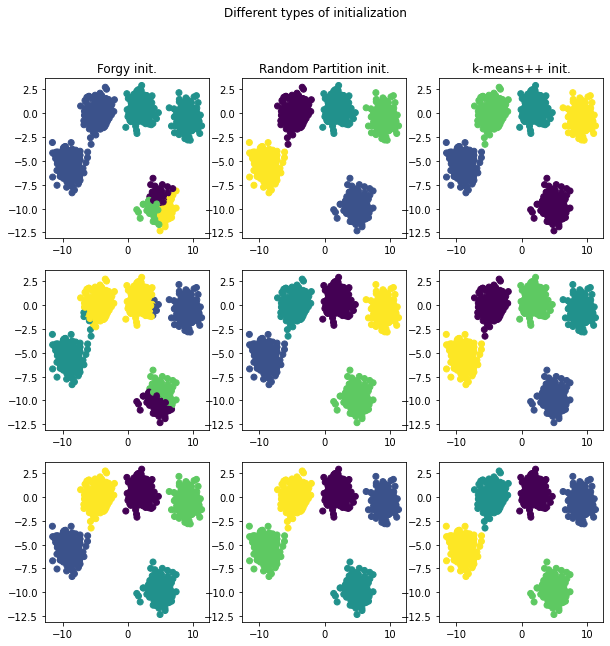

In [71]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))
for i in range(3):
    col_f = k_means_forgy(X_b, sample_size, cluster_cnt, features_cnt)
    col_rp = k_means_rand_part(X_b, sample_size, cluster_cnt, features_cnt)
    col_pp = k_means_plusplus(X_b, sample_size, cluster_cnt, features_cnt)
    axs[i, 0].scatter(X_b[:, 0], X_b[:, 1], c = col_f)
    axs[i, 1].scatter(X_b[:, 0], X_b[:, 1], c = col_rp)
    axs[i, 2].scatter(X_b[:, 0], X_b[:, 1], c = col_pp)
axs[0, 0].set_title("Forgy init.")
axs[0, 1].set_title("Random Partition init.")
axs[0, 2].set_title("k-means++ init.")
fig.suptitle("Different types of initialization")

# Для каких задач применим k-means

Как видно на предыдущих графиках, k-means практически правильно делает кластеризацию для равномощных кластеров шаровой формы.
Посмотрим, какой результат получится, если кластеры будут неравномощными:

In [72]:
cluster_cnt = 3
X_fil = np.vstack((X_b[y_b == 0][:1000], X_b[y_b == 1][:150], X_b[y_b == 2][:50]))

Text(0.5, 0.98, 'Unevenly sized blobs')

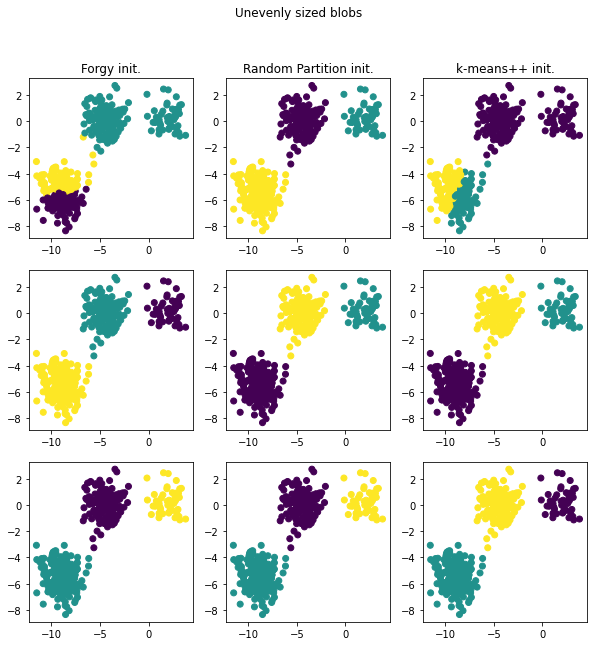

In [73]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))
for i in range(3):
    col_f = k_means_forgy(X_fil, len(X_fil), cluster_cnt, features_cnt)
    col_rp = k_means_rand_part(X_fil, len(X_fil), cluster_cnt, features_cnt)
    col_pp = k_means_plusplus(X_fil, len(X_fil), cluster_cnt, features_cnt)
    axs[i, 0].scatter(X_fil[:, 0], X_fil[:, 1], c = col_f)
    axs[i, 1].scatter(X_fil[:, 0], X_fil[:, 1], c = col_rp)
    axs[i, 2].scatter(X_fil[:, 0], X_fil[:, 1], c = col_pp)
axs[0, 0].set_title("Forgy init.")
axs[0, 1].set_title("Random Partition init.")
axs[0, 2].set_title("k-means++ init.")
fig.suptitle("Unevenly sized blobs")


Как видно, в основном кластеризация была проведена успешно, но иногда самый крупный кластер делится на 2 более мелких, что не совсем верно.

Теперь посмотрим, что будет, если "диаметр" кластеров будет заметно отличатся

In [74]:
X_var, y_var = make_blobs(n_samples = sample_size, cluster_std = [1.0, 2.7, 0.5], random_state = random_state)

Text(0.5, 0.98, 'Cluster with different diameters')

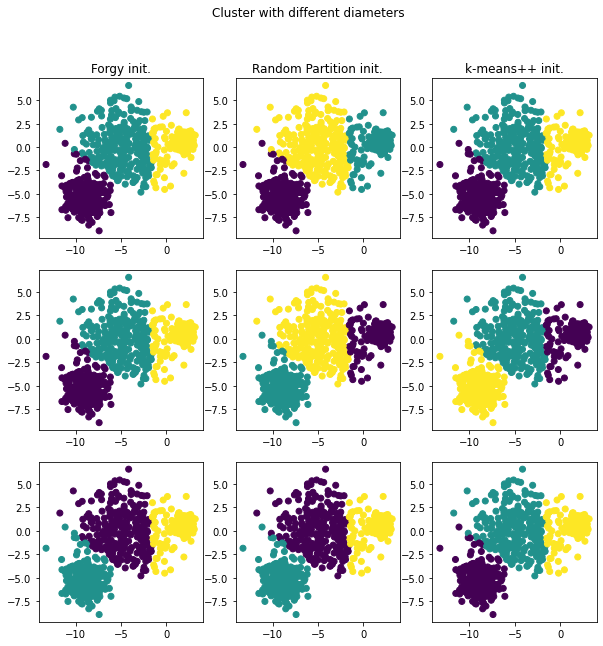

In [75]:
cluster_cnt = 3
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))
for i in range(3):
    col_f = k_means_forgy(X_var, sample_size, cluster_cnt, features_cnt)
    col_rp = k_means_rand_part(X_var, sample_size, cluster_cnt, features_cnt)
    col_pp = k_means_plusplus(X_var, sample_size, cluster_cnt, features_cnt)
    axs[i, 0].scatter(X_var[:, 0], X_var[:, 1], c = col_f)
    axs[i, 1].scatter(X_var[:, 0], X_var[:, 1], c = col_rp)
    axs[i, 2].scatter(X_var[:, 0], X_var[:, 1], c = col_pp)
axs[0, 0].set_title("Forgy init.")
axs[0, 1].set_title("Random Partition init.")
axs[0, 2].set_title("k-means++ init.")
fig.suptitle("Cluster with different diameters")

В этом случае вне зависимости от страгетий начальной инициализации кластеризация происходит более-менее верным образом.

Теперь посмотрим на результат кластеризации, если кластеры имеют нешаровидную форму.
Рассмотрим сначала распределения, имеющие форму луны.

In [76]:
X_m, y_m = make_moons(n_samples = sample_size, noise = 0.1)

Text(0.5, 0.98, 'Moon-shape clusters')

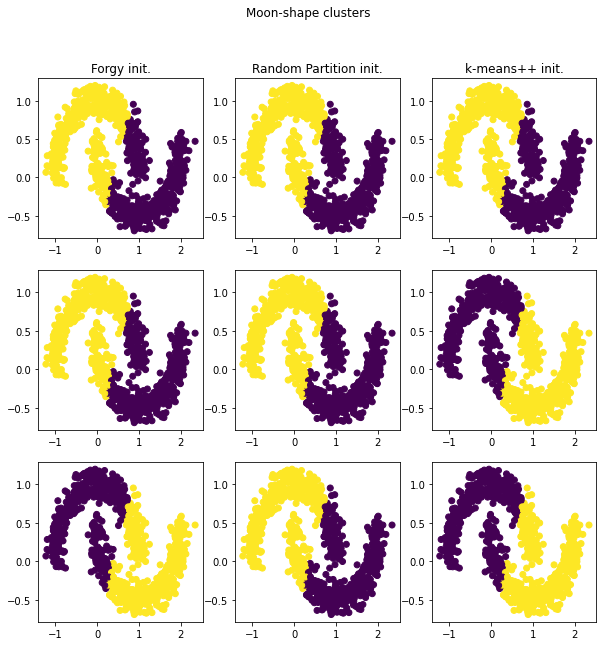

In [77]:
cluster_cnt = 2
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))
for i in range(3):
    col_f = k_means_forgy(X_m, sample_size, cluster_cnt, features_cnt)
    col_rp = k_means_rand_part(X_m, sample_size, cluster_cnt, features_cnt)
    col_pp = k_means_plusplus(X_m, sample_size, cluster_cnt, features_cnt)
    axs[i, 0].scatter(X_m[:, 0], X_m[:, 1], c = col_f)
    axs[i, 1].scatter(X_m[:, 0], X_m[:, 1], c = col_rp)
    axs[i, 2].scatter(X_m[:, 0], X_m[:, 1], c = col_pp)
axs[0, 0].set_title("Forgy init.")
axs[0, 1].set_title("Random Partition init.")
axs[0, 2].set_title("k-means++ init.")
fig.suptitle("Moon-shape clusters")

Как видно, с этой задачей k-means справляется очень плохо плохо.

А также посмотрим на распределения, имеющие форму вложенных кругов.


In [78]:
X_c, y_c = make_circles(n_samples = sample_size, noise = 0.1, factor=0.3)

Text(0.5, 0.98, 'Circle clusters')

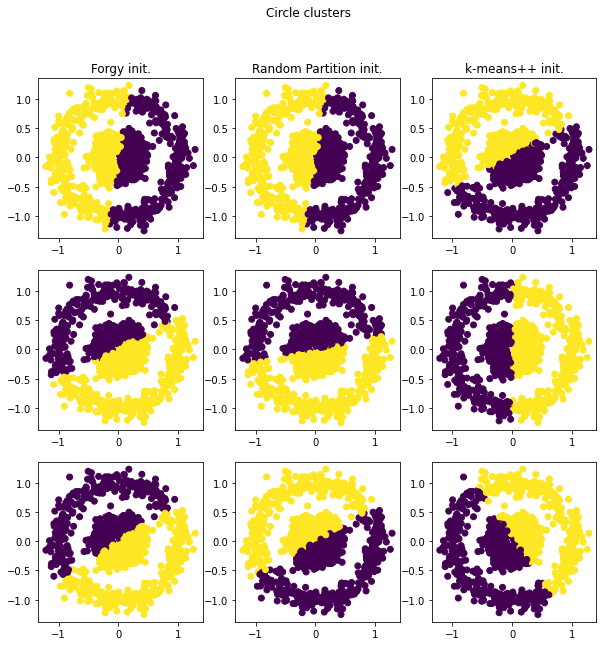

In [79]:
cluster_cnt = 2
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))
for i in range(3):
    col_f = k_means_forgy(X_c, sample_size, cluster_cnt, features_cnt)
    col_rp = k_means_rand_part(X_c, sample_size, cluster_cnt, features_cnt)
    col_pp = k_means_plusplus(X_c, sample_size, cluster_cnt, features_cnt)
    axs[i, 0].scatter(X_c[:, 0], X_c[:, 1], c = col_f)
    axs[i, 1].scatter(X_c[:, 0], X_c[:, 1], c = col_rp)
    axs[i, 2].scatter(X_c[:, 0], X_c[:, 1], c = col_pp)
axs[0, 0].set_title("Forgy init.")
axs[0, 1].set_title("Random Partition init.")
axs[0, 2].set_title("k-means++ init.")
fig.suptitle("Circle clusters")

Результаты снова оставляют желать лучшего.

Посмотрим на результат работы на распределениях, имеющих форму сильно вытянутых эллипсов

In [80]:
cluster_cnt = 3
X_b, y_b = make_blobs(n_samples = sample_size, n_features = features_cnt, centers = cluster_cnt, random_state = random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_el = np.matmul(X_b, transformation)

Text(0.5, 0.98, 'Enlongated clusters')

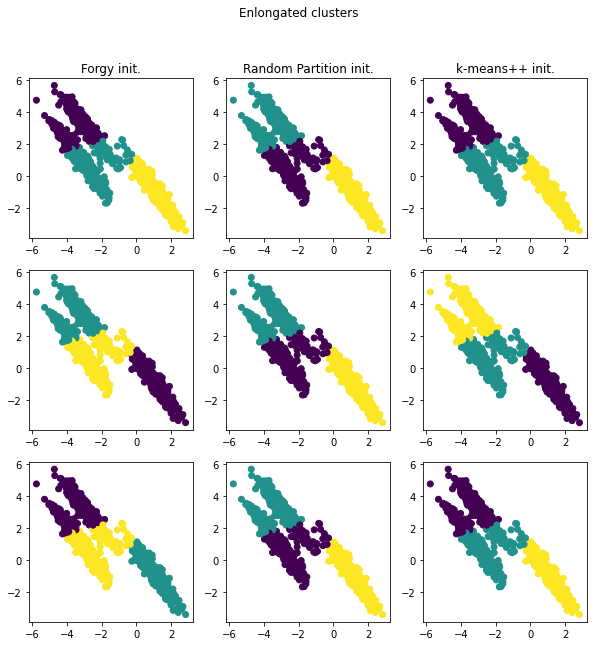

In [81]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))
for i in range(3):
    col_f = k_means_forgy(X_el, sample_size, cluster_cnt, features_cnt)
    col_rp = k_means_rand_part(X_el, sample_size, cluster_cnt, features_cnt)
    col_pp = k_means_plusplus(X_el, sample_size, cluster_cnt, features_cnt)
    axs[i, 0].scatter(X_el[:, 0], X_el[:, 1], c = col_f)
    axs[i, 1].scatter(X_el[:, 0], X_el[:, 1], c = col_rp)
    axs[i, 2].scatter(X_el[:, 0], X_el[:, 1], c = col_pp)
axs[0, 0].set_title("Forgy init.")
axs[0, 1].set_title("Random Partition init.")
axs[0, 2].set_title("k-means++ init.")
fig.suptitle("Enlongated clusters")

В этом случае кластеризация также проходит неудачно.

Таким образом, алгоритм k-means применим в основном для кластеров шаровой формы

# Стратегии выбора числа кластеров

Исходя из предыдущего раздела видно, что k-means хорошо работает для кластеров шаровидной формы.
Попробуем угадать число кластеров для таких распределений.
Будем действовать итерационно.
Выберем какое-либо значение k.
Возьмем значение k - 1, k, k + 1 и применим для них алгоритм k-means.
Затем посчитаем диаметр кластеров при k - 1, k, k + 1
Если минимум этой суммы достигается при k, то остановим алгоритм.
Иначе перейдем с следующей итерации, где положим k равным либо k - 1, либо k + 1, в зависимсти от того,
где сумма расстояний меньше.

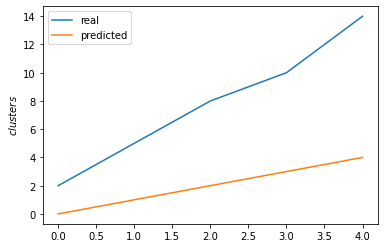

In [82]:
clust_cnt = 3
X, y = make_blobs(n_samples = sample_size, n_features = features_cnt, centers = cluster_cnt, random_state = random_state)
def find_clust_cnt(X):
    k = 4
    for i in range(10):
        sums = [0] * cluster_cnt
        for d in (-1, 0, 1):
            l = k_means_plusplus(X, sample_size, k + d, features_cnt)
            for i in range(sample_size):
                sums[d + 1] = max(sums[d + 1], dist(X[i], centers[l[i]], features_cnt))
        m = min(sums)
        if m == sums[0]:
            k -= 1
        elif m == sums[2]:
            k += 1
        else:
            return k
real_cnt = [2, 5, 8, 10, 14]
predict_cnt = []
for i in real_cnt:
    predict_cnt.append(find_clust_cnt(X))
plt.plot(np.arange(5), real_cnt, label = "real")
plt.plot(np.arange(5), label = "predicted")
plt.ylabel('$clusters$')
plt.legend()

Как видно, данный алгоритм дает неточный результат, поэтому лучше его не использовать.

# Зависимость скорости настройки от объема данных и сложности задачи

Рассмотрим несколько выборок разного объема:

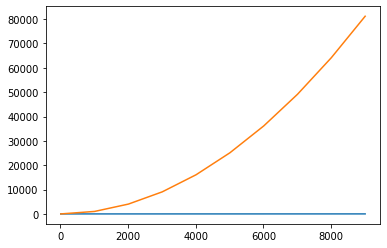

In [90]:
from datetime import datetime
cluster_cnt = 3
sizes = [i for i in range(10, 10000, 1000)]
times = []
for i in sizes:
    start_time = datetime.now()
    X, y = make_blobs(n_samples = i, n_features = features_cnt, centers = cluster_cnt, random_state = random_state)
    l = k_means_plusplus(X, i, cluster_cnt, features_cnt)
    times.append((datetime.now() - start_time).total_seconds())
plt.plot(sizes, times)
plt.plot(sizes, [0.001 * i * i for i in sizes])

Тогда можно сделать предположение о том, что если число кластеров и размерность векторов фиксированы,
то время работы линейно зависит от объема входных данных.

Теперь исследуем зависимость скорости настройки об сложности задачи.

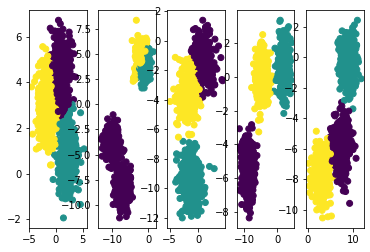

In [86]:
rnd_st = [0, 1, 2, 170, 1000]
cluster_cnt = 3
sample_size = 1000
times = []
fig, axs = plt.subplots(ncols = 5)
k = 0
for i in rnd_st:
    start_time = datetime.now()
    X_b, y_b = make_blobs(n_samples = sample_size, n_features = features_cnt, centers = cluster_cnt, random_state = i)
    l = k_means_plusplus(X_b, sample_size, cluster_cnt, features_cnt)
    times.append((datetime.now() - start_time).total_seconds())
    axs[k].scatter(X_b[:, 0], X_b[:, 1], c = l)
    k += 1

Text(0.5, 0, 'Time in seconds')

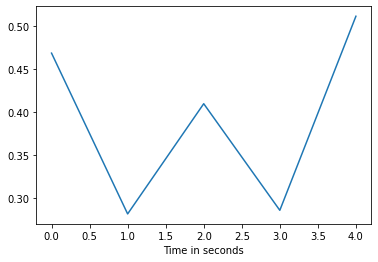

In [87]:
fig, ax = plt.subplots()
ax.plot([i for i in range(5)], times)
ax.set_xlabel("Experiment number")
ax.set_xlabel("Time in seconds")

Как видно, в случае, когда кластеры "слипаются", время работы больше, ежели когда кластеры находятся на расстоянии друг от друга

# Визуализация матрицы попарных расстояний

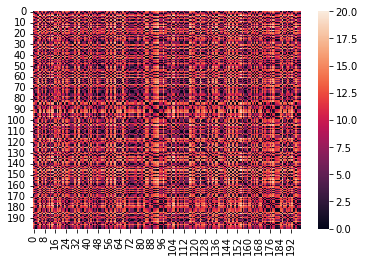

In [88]:
sample_size = 200
cluster_cnt = 4
X, y = make_blobs(n_samples = sample_size, n_features = features_cnt, centers = cluster_cnt, random_state = random_state)
matrix = np.arange(sample_size * sample_size).reshape(sample_size, sample_size)
for i in range(sample_size):
    for j in range(sample_size):
        matrix[i][j] = dist(X[i], X[j], features_cnt)
ax = sns.heatmap(matrix)


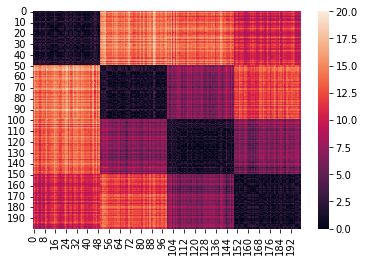

In [89]:
l = k_means_plusplus(X, sample_size, cluster_cnt, features_cnt)
matrix_s = np.arange(sample_size * sample_size).reshape(sample_size, sample_size)
per = []
for i in range(cluster_cnt):
    for j in range(sample_size):
        if (l[j] == i):
            per.append(j)
k = 0
for i in per:
    l = 0
    for j in per:
        matrix_s[k][l] = dist(X[i], X[j], features_cnt)
        l +=1 
    k += 1
ax = sns.heatmap(matrix_s)

Можно предложить следующую стратегию для визуализации:
отсортировать кластеры в порядке убывания количества элементов